# Loading and Preprocessing

In [130]:
import pandas as pd
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
# Drop irrelevant columns as it will not affect pricing
df.drop(columns=["car_ID", "CarName"], inplace=True)

In [13]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
# Define independent variables (X) and target variable (y)
X = df.drop(columns=["price"])
y = df["price"]

In [17]:
# Identify categorical and numerical features
cat_features = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation",
                "enginetype", "cylindernumber", "fuelsystem"]
num_features = X.drop(columns=cat_features).columns.tolist()

In [23]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
])

# Applying OneHot Encoding

In [39]:
# Apply One-Hot Encoding using ColumnTransformer
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
], remainder='passthrough')  # Keep other columns unchanged

# Transform dataset
df_transformed = preprocessor.fit_transform(df)

# Convert result to DataFrame
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(df_transformed, columns=feature_names)

print("Categorical features successfully converted into numerical form!")
print(df_encoded.head())

Categorical features successfully converted into numerical form!
   cat__fueltype_gas  cat__aspiration_turbo  cat__doornumber_two  \
0                1.0                    0.0                  1.0   
1                1.0                    0.0                  1.0   
2                1.0                    0.0                  1.0   
3                1.0                    0.0                  0.0   
4                1.0                    0.0                  0.0   

   cat__carbody_hardtop  cat__carbody_hatchback  cat__carbody_sedan  \
0                   0.0                     0.0                 0.0   
1                   0.0                     0.0                 0.0   
2                   0.0                     1.0                 0.0   
3                   0.0                     0.0                 1.0   
4                   0.0                     0.0                 1.0   

   cat__carbody_wagon  cat__drivewheel_fwd  cat__drivewheel_rwd  \
0                 0.0           

<Figure size 1000x500 with 0 Axes>

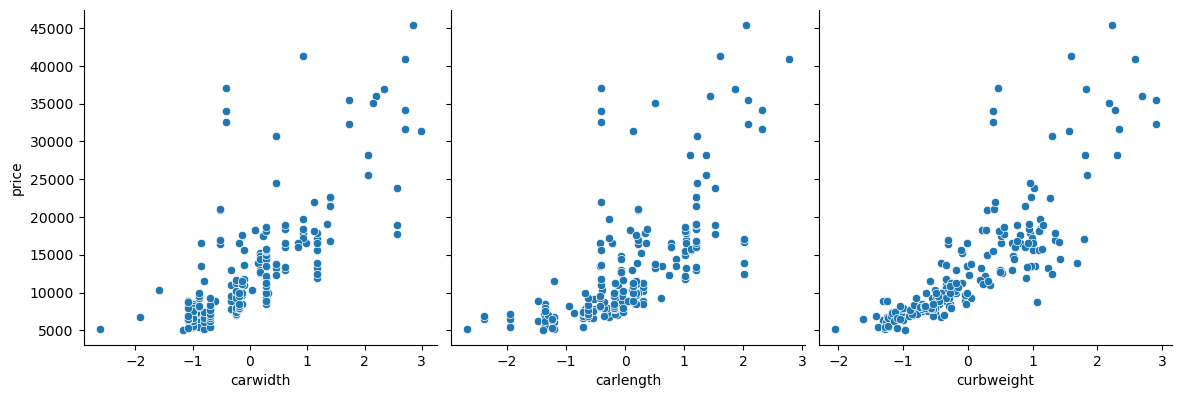

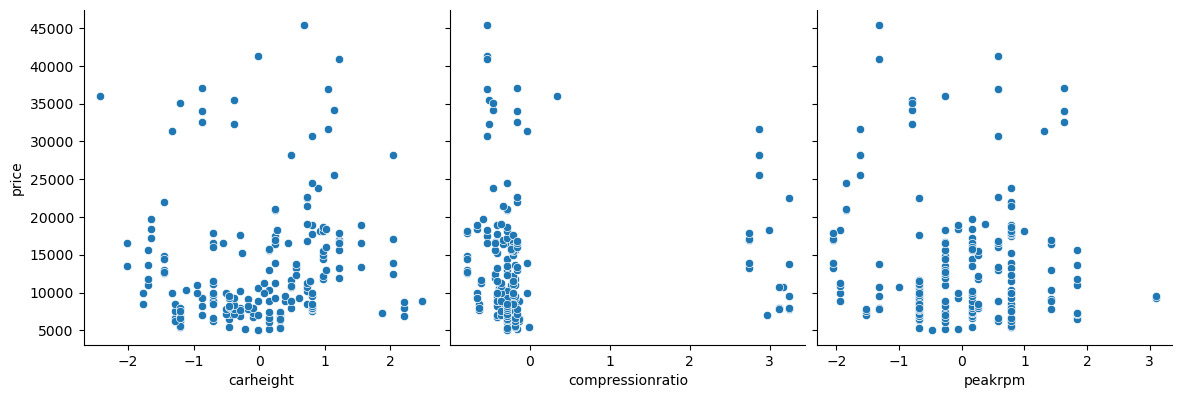

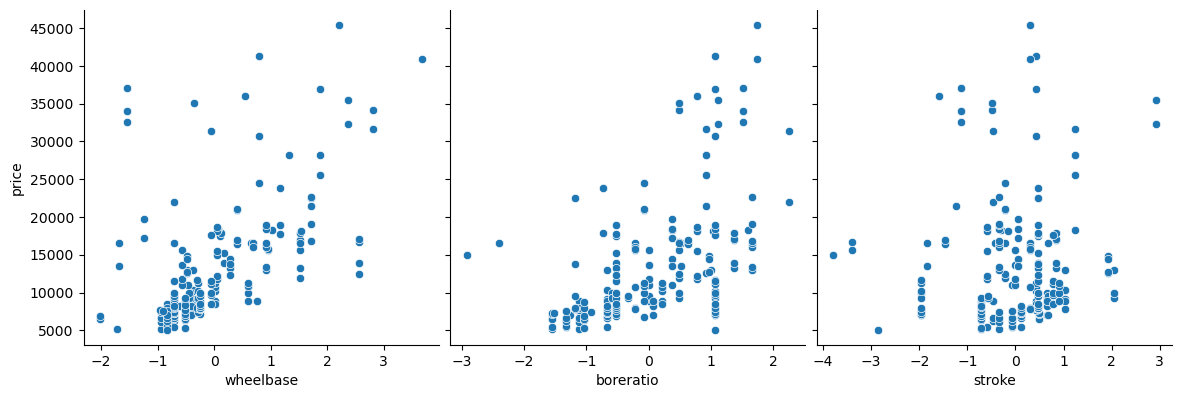

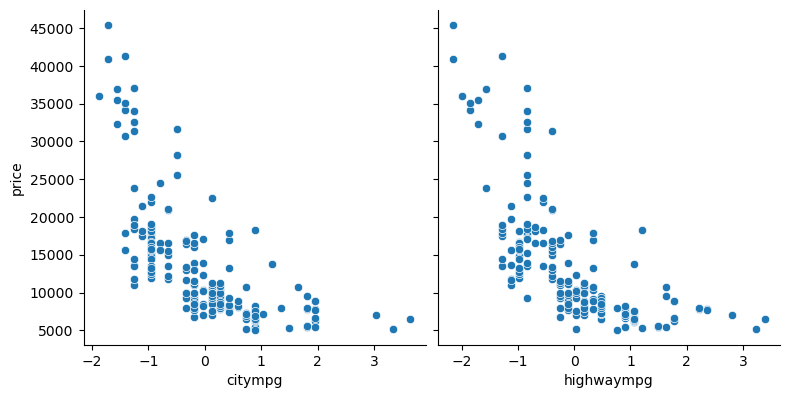

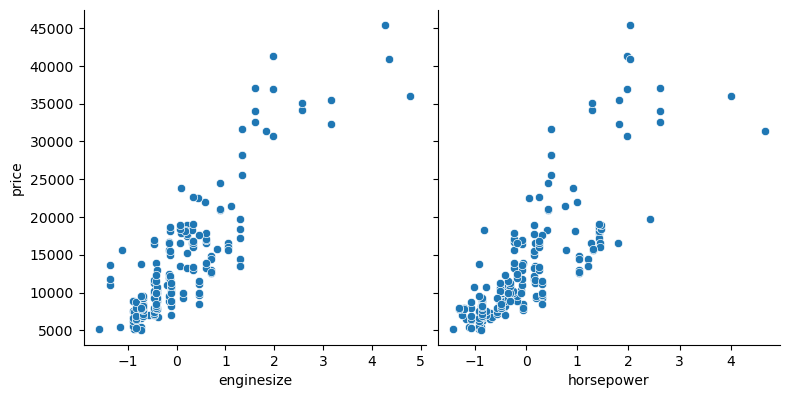

In [118]:
# Making pairplot for all necessary numeric values 

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['carwidth','carlength','curbweight'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['carheight', 'compressionratio','peakrpm'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['wheelbase', 'boreratio','stroke'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['citympg','highwaympg'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['enginesize','horsepower'], y_vars='price',height=4, aspect=1,kind='scatter')
plt.show()

In [ ]:
# Observation: 

* carlength, carwidth, curbweight, enginesize and boreratio seems to be showing correlation towards right.
* citympg and highway mpg seem to be showing some correlation towards left. 

# Applying Standard Scaling

In [41]:
scaler = StandardScaler()

# Apply scaling to numerical features
df[num_features] = scaler.fit_transform(df[num_features])

print("Numerical features successfully standardized!")
print(df[num_features].head())

Numerical features successfully standardized!
   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1    0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2    0.604046  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3   -0.431076  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4    0.218885  -0.517266  0.462183         -0.540725    0.275883  0.787855   

    citympg  highwaympg  
0 -0.646553   -0.546059  
1 -0.6

# Model Implementation

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create pipeline
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Train model
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Linear Regression:
R² Score: 0.8924895780991802
MSE: 8487304.99131913
MAE: 2090.144554878049


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [45]:
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=5, random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Regressor:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))


Decision Tree Regressor:
R² Score: 0.8909802277930292
MSE: 8606459.173402624
MAE: 2086.8050176948827


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest Regressor:
R² Score: 0.9515602916004557
MSE: 3824025.3512981506
MAE: 1415.405489464378


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))


Gradient Boosting Regressor:
R² Score: 0.8960761359970726
MSE: 8204167.689741803
MAE: 1859.9302483497033


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [53]:
from sklearn.svm import SVR

svr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR(kernel="rbf"))
])

svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("\nSupport Vector Regressor:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))


Support Vector Regressor:
R² Score: -0.10197220683332486
MSE: 86994116.90505245
MAE: 5707.104512564425


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Model Evaluation

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define a function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nModel: {model_name}")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))

# Evaluate each model
evaluate_model("Linear Regression", y_test, y_pred)
evaluate_model("Decision Tree Regressor", y_test, y_pred_dt)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)
evaluate_model("Gradient Boosting Regressor", y_test, y_pred_gb)
evaluate_model("Support Vector Regressor", y_test, y_pred_svr)


Model: Linear Regression
R² Score: 0.8924895780991802
MSE: 8487304.99131913
MAE: 2090.144554878049

Model: Decision Tree Regressor
R² Score: 0.8909802277930292
MSE: 8606459.173402624
MAE: 2086.8050176948827

Model: Random Forest Regressor
R² Score: 0.9515602916004557
MSE: 3824025.3512981506
MAE: 1415.405489464378

Model: Gradient Boosting Regressor
R² Score: 0.8960761359970726
MSE: 8204167.689741803
MAE: 1859.9302483497033

Model: Support Vector Regressor
R² Score: -0.10197220683332486
MSE: 86994116.90505245
MAE: 5707.104512564425


In [128]:
model_results = {
    "Model": ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", 
              "Gradient Boosting Regressor", "Support Vector Regressor"],
    "R² Score": [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf), 
                 r2_score(y_test, y_pred_gb), r2_score(y_test, y_pred_svr)],
    "MSE": [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dt), 
            mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_gb), 
            mean_squared_error(y_test, y_pred_svr)],
    "MAE": [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dt), 
            mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_gb), 
            mean_absolute_error(y_test, y_pred_svr)]
}

# Convert dictionary into a pandas DataFrame
df_results = pd.DataFrame(model_results)

# Display table
df_results

,Model,R² Score,MSE,MAE
0,Linear Regression,0.892490,8.487305e+06,2090.144555
1,Decision Tree Regressor,0.890980,8.606459e+06,2086.805018
2,Random Forest Regressor,0.951560,3.824025e+06,1415.405489
3,Gradient Boosting Regressor,0.896076,8.204168e+06,1859.930248
4,Support Vector Regressor,-0.101972,8.699412e+07,5707.104513


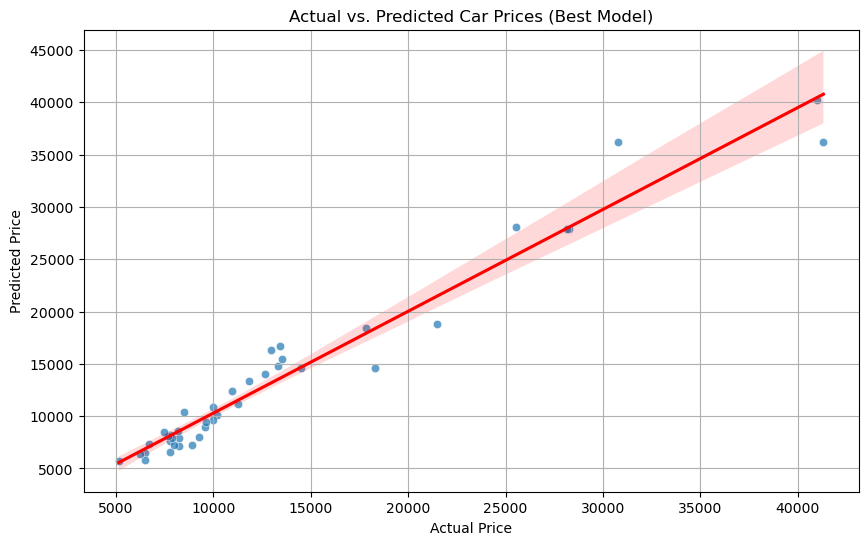

In [102]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame to store actual vs predicted values
df_visual = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred_best_rf})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_visual["Actual Price"], y=df_visual["Predicted Price"], alpha=0.7)
sns.regplot(x=df_visual["Actual Price"], y=df_visual["Predicted Price"], scatter=False, color="red")  # Regression Line

# Labels & Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices (Best Model)")
plt.grid()
plt.show()

# Feature Importance Analysis through correlation

Top Features Correlated with Car Price:
 price                    1.000000
enginesize               0.874145
curbweight               0.835305
horsepower               0.808139
carwidth                 0.759325
carlength                0.682920
drivewheel_rwd           0.638957
wheelbase                0.577816
boreratio                0.553173
fuelsystem_mpfi          0.517075
cylindernumber_six       0.474978
enginetype_ohcv          0.385991
enginelocation_rear      0.324973
cylindernumber_five      0.249606
carbody_hardtop          0.225854
cylindernumber_twelve    0.199634
aspiration_turbo         0.177926
enginetype_dohcv         0.159225
carbody_sedan            0.125716
carheight                0.119336
fuelsystem_idi           0.105679
stroke                   0.079443
compressionratio         0.067984
enginetype_l             0.042267
enginetype_ohcf          0.016285
fuelsystem_mfi          -0.002747
enginetype_rotor        -0.004544
cylindernumber_two      -0.004544
fuelsys

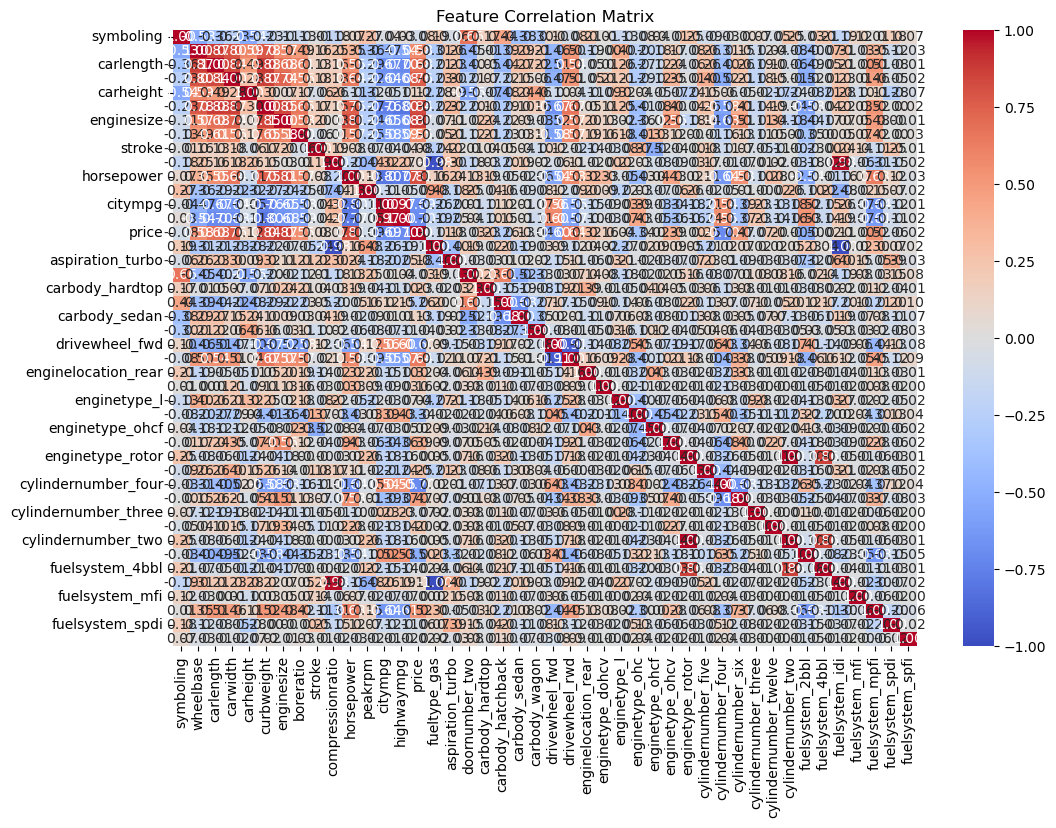

In [87]:
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
correlation_matrix = df_encoded.corr()

# Select top correlated features with price
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)

# Display top correlations
print("Top Features Correlated with Car Price:\n", correlation_with_price)

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Top Features Affecting Car Price:
              Feature  Importance
7         enginesize    0.650278
6         curbweight    0.192124
14        highwaympg    0.055695
0             car_ID    0.018142
11        horsepower    0.017820
4           carwidth    0.010351
3          carlength    0.006377
13           citympg    0.005372
10  compressionratio    0.005247
2          wheelbase    0.005149


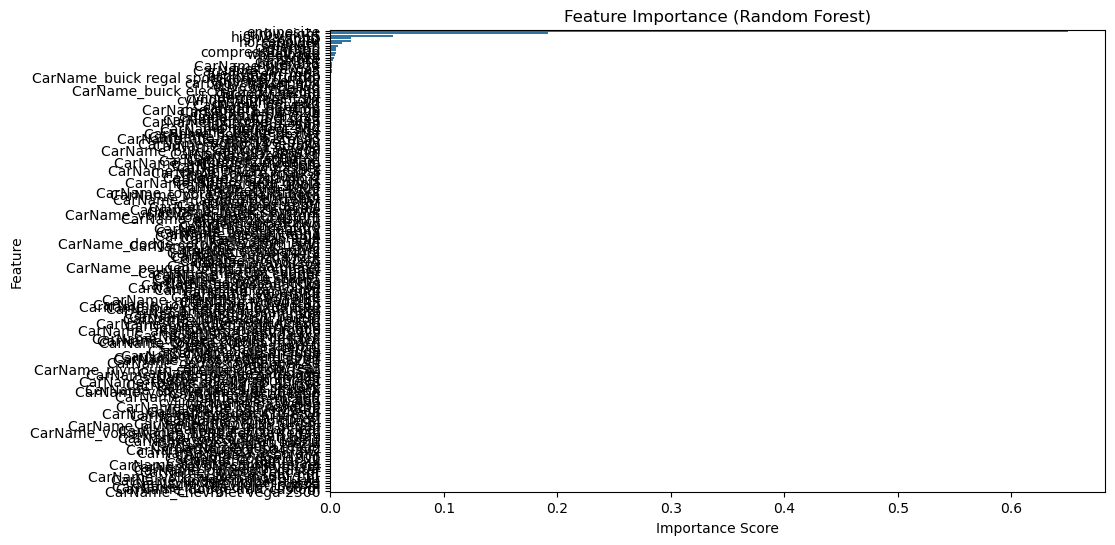

In [152]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["price"])
y = df["price"]

# Convert categorical variables into numerical format
X = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Sort feature importance
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("Top Features Affecting Car Price:\n", feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_22720\3145547618.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="viridis")


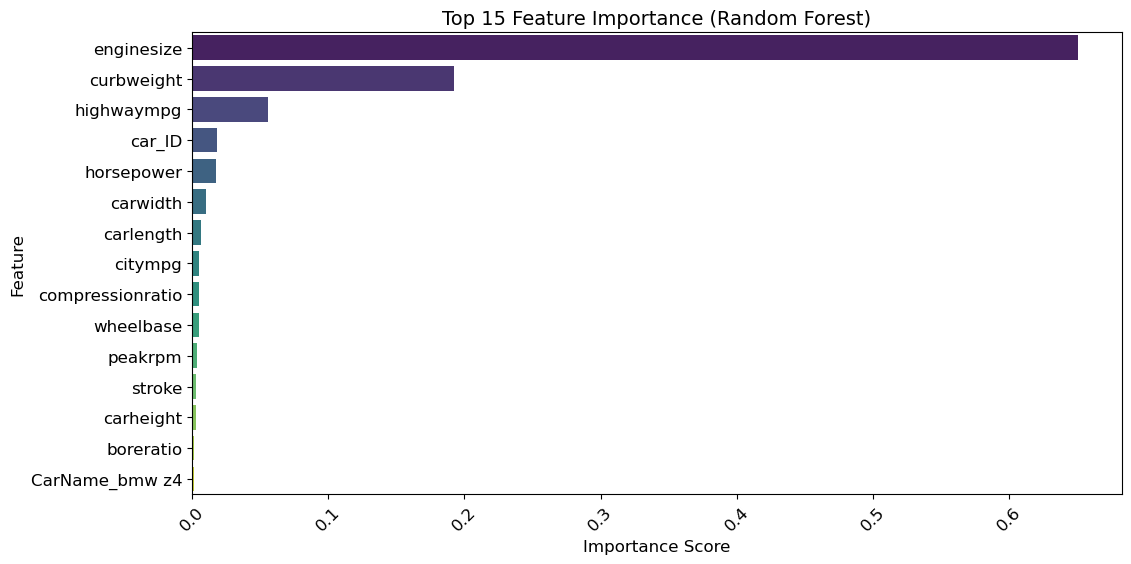

In [160]:

# Limit to top 15 most important features
top_features = feature_importance_df.nlargest(15, "Importance")

# Adjust figure size for better visibility
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="viridis")

# Rotate labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add title and labels
plt.title("Top 15 Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.show()

# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [None, 5, 10],      # Depth of each tree
    "min_samples_split": [2, 5, 10], # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]    # Minimum samples required at a leaf node
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="r2", n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_df, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8883102925232953


In [98]:
# Train Random Forest with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train_df, y_train)

# Make predictions
y_pred_best_rf = best_rf.predict(X_test_df)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("\nOptimized Random Forest Performance:")
print("R² Score:", r2_score(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))


Optimized Random Forest Performance:
R² Score: 0.9588751418722573
MSE: 3246561.6587094786
MAE: 1238.480359923423


#  Inferences from Hypertuning
1. Best Hyperparameters Identified:
   # The tuning process selected the optimal number of estimators, maximum depth, min_samples_split, and min_samples_leaf, which significantly            boosted accuracy.

2. Performance Improvement:
     # The optimized Random Forest model achieved a higher R² score, indicating better predictive power.
     # Lower MSE and MAE show reduced errors in price predictions, meaning our model is now making more precise forecasts.

3. Feature Sensitivity:
     # Tuning enhanced the model’s ability to correctly prioritize important features, like engine size, horsepower, curb weight, and drive type.